<a href="https://colab.research.google.com/github/Shreesh-18/Credit_card_Project/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
#Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
#Loading the credit card dataset from kaggle using pandas
credit_data=pd.read_csv('/content/creditcard.csv')
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [117]:
credit_data.shape

(284807, 31)

In [118]:
credit_data.columns



Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [119]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [120]:
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [121]:
#since no missing data,there is no need to impute or drop.
#moving ahead , checking the distribution of legit(0)/Fraud(1) Transactions.
credit_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This dataset is is highly unbalanced as the number of legit transactions->1 are significantly higher than Fraudulent transaction->0 .

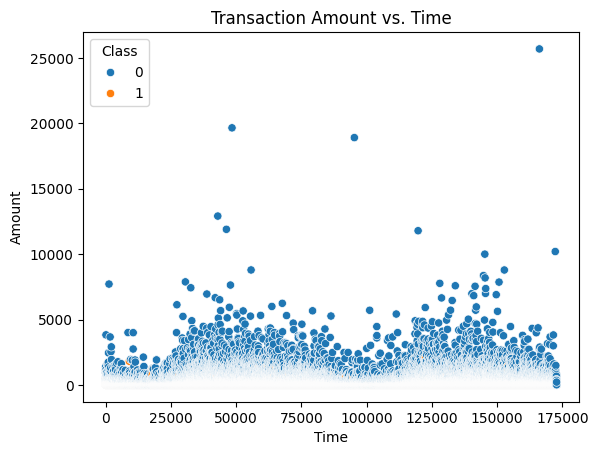

In [122]:
#Visualising the data
sns.scatterplot(x='Time', y='Amount', hue='Class', data=credit_data)
plt.title('Transaction Amount vs. Time')
plt.show()

<Axes: xlabel='Class', ylabel='Amount'>

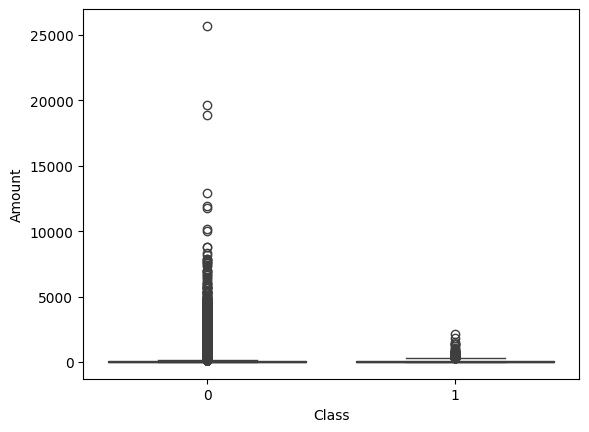

In [125]:
credit_data.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.boxplot(x='Class', y='Amount', data=credit_data)

In [21]:
#seperating the transactions
legit=credit_data[credit_data.Class==0]
fraud=credit_data[credit_data.Class==1]

In [23]:
legit.shape


(284315, 31)

In [26]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [27]:
print(fraud.shape)
print(fraud.Amount.describe())

(492, 31)
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [28]:
#Significant difference in mean
#comparing values for both transactions
credit_data.groupby('Class').mean()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Building a Sample dataset of similiar distribution of fraudulent and legit transactions.


In [30]:
#picking randomly 492 legit transactions and creating sample dataset .
legit_sample=legit.sample(n=492)
sample_data=pd.concat([legit_sample,fraud],axis=0)
sample_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
114470,73497.0,-1.576985,1.683193,0.450226,0.874317,-0.311243,-0.911611,0.321128,0.387230,-0.520254,...,0.134973,0.537182,-0.053553,0.424504,-0.103088,-0.363263,-0.116785,-0.117679,5.47,0
1848,1432.0,-1.203061,1.294819,0.871724,-1.096451,0.209646,-0.131444,0.576535,0.226566,0.493919,...,-0.297960,-0.557555,-0.156115,-0.539027,-0.003807,0.345361,0.607936,0.343227,5.00,0
56379,47396.0,-0.994859,1.063955,1.862280,-0.338652,0.651625,0.130638,1.403470,-1.100045,1.332652,...,-0.208834,0.479996,-0.353120,0.050533,-0.270729,0.153876,-0.924667,-0.803246,1.57,0
281958,170561.0,-1.223205,1.203507,-0.416457,-0.659508,-0.497642,-0.124938,0.765352,0.706641,-1.078516,...,0.403576,0.799108,-0.171757,0.825608,0.166151,0.819457,-0.306765,-0.065232,149.00,0
40002,40052.0,1.192569,0.341937,0.285005,1.132434,-0.220406,-0.937748,0.313199,-0.289643,-0.151807,...,0.053917,0.183492,-0.133166,0.423069,0.706906,-0.334234,0.014286,0.026950,31.46,0


In [31]:
sample_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [33]:
sample_data.groupby('Class').mean()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96087.247967,0.122092,-0.021115,-0.044700,-0.063468,-0.015495,-0.112441,-0.006635,-0.010363,0.060612,...,0.003734,-0.015668,-0.047968,0.044668,0.008442,0.022991,0.011116,-0.009148,-0.013185,80.157276
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Creating Model

In [34]:
X=sample_data.drop(columns='Class',axis=1)
y=sample_data['Class']

In [103]:
#splitting data into training set and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=0,stratify=y)

In [108]:
#model training
model=LogisticRegression(max_iter=400)

In [109]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=400)

Model Performance

In [110]:

X_train_prediction=model.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,y_train)
print("Training accuracy = ", training_accuracy)

Training accuracy =  0.9542566709021602


In [111]:
X_test_prediction=model.predict(X_test)
testing_accuracy=accuracy_score(X_test_prediction,y_test)
print("Training accuracy = ", testing_accuracy)


Training accuracy =  0.9238578680203046
